# Bankruptcy Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")

# Data Loading and Cleaning

In [2]:
data = pd.read_csv("C:\\Users\\Pranitaa Aruchamy\\OneDrive\\Documents\\PROJECTS\\Bankruptcy.csv")
data.columns = [i.title().strip() for i in list(data.columns)]


row = data.shape[0]
col = data.shape[1]
print("The number of rows within the dataset are {} and the number of columns is {}".format(row,col))

The number of rows within the dataset are 6819 and the number of columns is 96


In [3]:
data.head()

,Bankrupt?,Roa(C) Before Interest And Depreciation Before Interest,Roa(A) Before Interest And % After Tax,Roa(B) Before Interest And Depreciation After Tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-Tax Net Interest Rate,After-Tax Net Interest Rate,Non-Industry Income And Expenditure/Revenue,...,Net Income To Total Assets,Total Assets To Gnp Price,No-Credit Interval,Gross Profit To Sales,Net Income To Stockholder'S Equity,Liability To Equity,Degree Of Financial Leverage (Dfl),Interest Coverage Ratio (Interest Expense To Ebit),Net Income Flag,Equity To Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
data.isnull().sum().sort_values(ascending=False).head()

Bankrupt?                                                  0
Roa(C) Before Interest And Depreciation Before Interest    0
Total Expense/Assets                                       0
Total Income/Total Expense                                 0
Retained Earnings To Total Assets                          0
dtype: int64

# Data Visualization

In [6]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

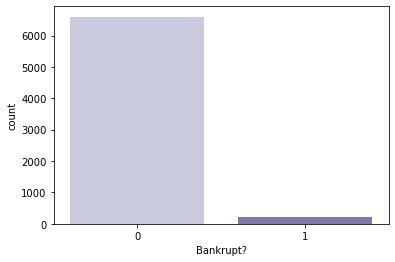

In [7]:
value = randint(0, len(colors)-1)

sns.countplot('Bankrupt?',data=data,palette = colors[value])

In [8]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [9]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

data[categorical_features].columns.tolist()

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64


<AxesSubplot:xlabel='Liability-Assets Flag', ylabel='count'>

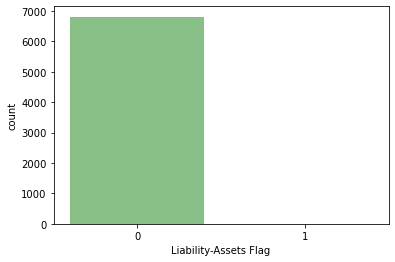

In [10]:
value = randint(0, len(colors)-1)

print(data['Liability-Assets Flag'].value_counts())
sns.countplot('Liability-Assets Flag',data=data,palette = colors[value])

Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
dtype: int64


<AxesSubplot:xlabel='Liability-Assets Flag', ylabel='count'>

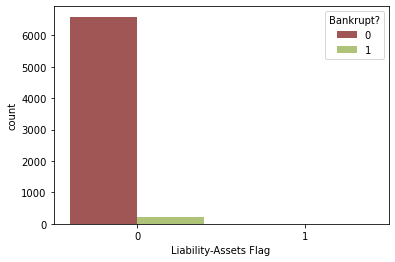

In [11]:
value = randint(0, len(colors)-1)

print(data[['Liability-Assets Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

1    6819
Name: Net Income Flag, dtype: int64


<AxesSubplot:xlabel='Net Income Flag', ylabel='count'>

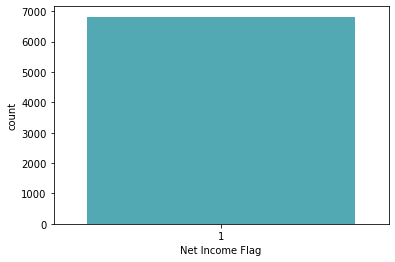

In [12]:
value = randint(0, len(colors)-1)

print(data['Net Income Flag'].value_counts())
sns.countplot('Net Income Flag',data=data,palette = colors[value])

Net Income Flag  Bankrupt?
1                0            6599
                 1             220
dtype: int64


<AxesSubplot:xlabel='Net Income Flag', ylabel='count'>

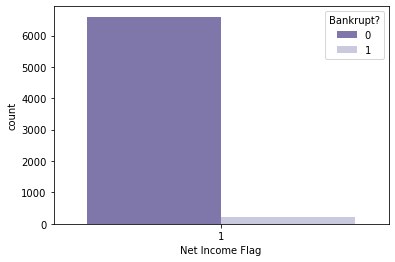

In [13]:
value = randint(0, len(colors)-1)

print(data[['Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

In [14]:
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data[negative_corr + ["Bankrupt?"]].copy()

In [15]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])

    plt.tight_layout(pad=0.5)

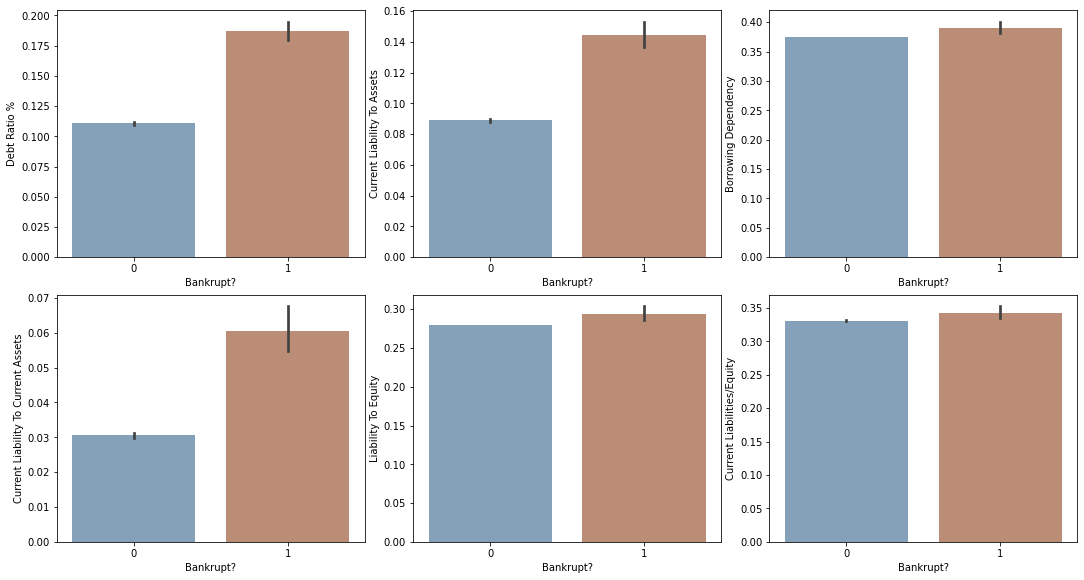

In [16]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

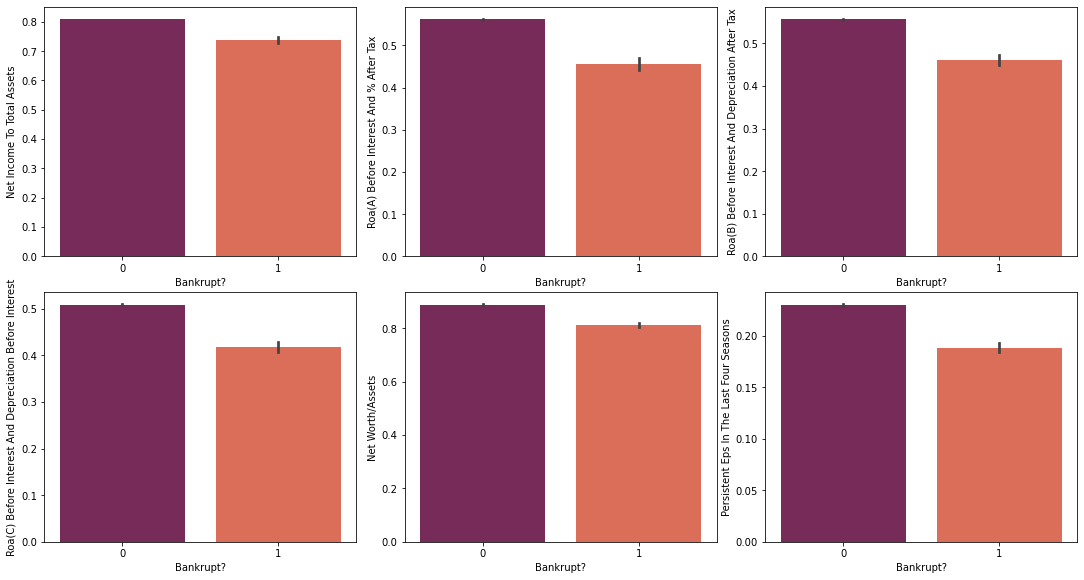

In [17]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

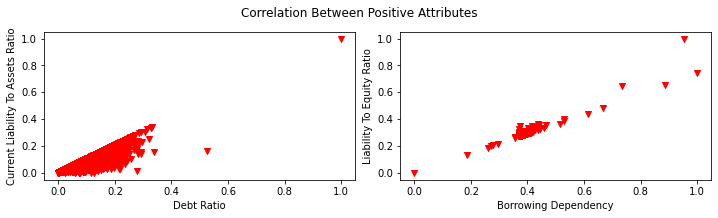

In [18]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(data["Debt Ratio %"],data["Current Liability To Assets"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(data["Borrowing Dependency"],data["Liability To Equity"], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

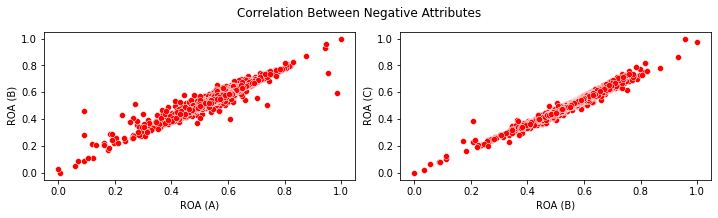

In [19]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=data, x='Roa(A) Before Interest And % After Tax', y='Roa(B) Before Interest And Depreciation After Tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=data, x='Roa(B) Before Interest And Depreciation After Tax', y='Roa(C) Before Interest And Depreciation Before Interest',color = 'red')

plt.tight_layout(pad=0.8)

<AxesSubplot:>

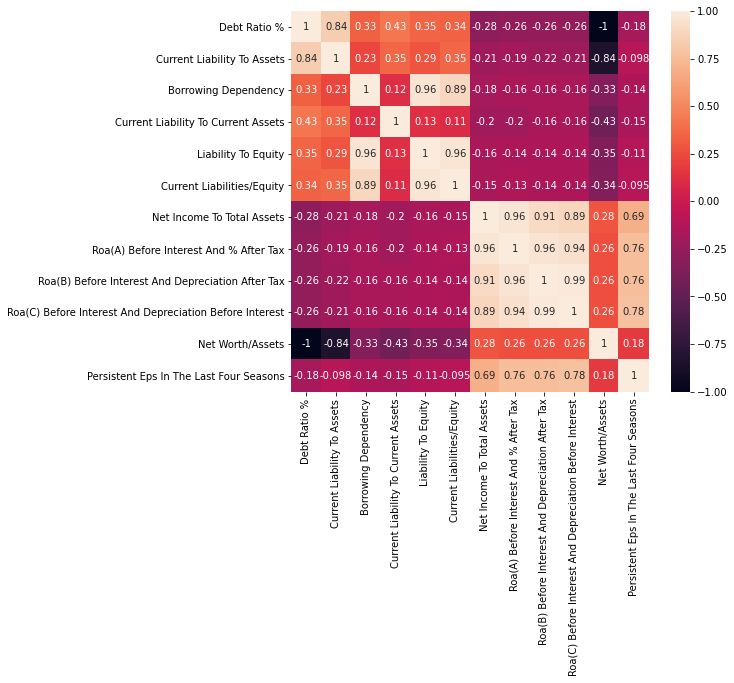

In [20]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(data[relation].corr(),annot=True)

# Data Modeling

In [5]:
#defining dependent and independent variables
x = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

In [6]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1300   18]
 [  46    0]]
accuracy score =  0.9530791788856305
Classification Report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1364
   macro avg       0.48      0.49      0.49      1364
weighted avg       0.93      0.95      0.94      1364



In [18]:
from sklearn.neighbors import KNeighborsClassifier
print("K Nearest Neighbour")
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)


#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knn = accuracy_score(y_test,y_pred)
print('accuracy score = ',knn)
print("Classification Report",classification_report(y_test,y_pred))

K Nearest Neighbour
confusion matrix:
 [[1317    1]
 [  46    0]]
accuracy score =  0.9655425219941349
Classification Report               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



In [24]:
#training model
#from sklearn.svm import SVC
#svc = SVC(kernel = 'rbf')
#svc.fit(x_train,y_train)

#getting confusion matrix
#from sklearn.metrics import confusion_matrix,classification_report
#y_pred = svc.predict(x_test)
#cm = confusion_matrix(y_test,y_pred)
#print('confusion matrix:\n',cm)

#checking accuracy
#from sklearn.metrics import accuracy_score
#sva2 = accuracy_score(y_test,y_pred)
#print('accuracy score = ',accuracy_score(y_test,y_pred))
#print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1318    0]
 [  46    0]]
accuracy score =  0.966275659824047
Classification Report               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



In [20]:
#training model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dt = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix: [[1287   31]
 [  31   15]]
accuracy score =  0.9545454545454546
Classification Report               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1318
           1       0.33      0.33      0.33        46

    accuracy                           0.95      1364
   macro avg       0.65      0.65      0.65      1364
weighted avg       0.95      0.95      0.95      1364



In [26]:
#from xgboost import XGBClassifier
#xgb = XGBClassifier()
#xgb.fit(x_train,y_train)

#getting confusion matrix
#from sklearn.metrics import confusion_matrix,classification_report
#y_pred = xgb.predict(x_test)
#cm = confusion_matrix(y_test,y_pred)
#print('confusion matrix:\n',cm)

#checking accuracy
#from sklearn.metrics import accuracy_score
#xgba = accuracy_score(y_test,y_pred)
#print('accuracy score = ',accuracy_score(y_test,y_pred))
#print("Classification Report",classification_report(y_test,y_pred))

[22:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix:
 [[1307   11]
 [  36   10]]
accuracy score =  0.9655425219941349
Classification Report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.48      0.22      0.30        46

    accuracy                           0.97      1364
   macro avg       0.72      0.60      0.64      1364
weighted avg       0.96      0.97      0.96      1364



In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rf = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1309    9]
 [  36   10]]
accuracy score =  0.967008797653959
Classification Report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.53      0.22      0.31        46

    accuracy                           0.97      1364
   macro avg       0.75      0.61      0.65      1364
weighted avg       0.96      0.97      0.96      1364



In [29]:
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))